<a href="https://colab.research.google.com/github/nidhi-158/FeynnLabs_EV-market/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [ ]:
df=pd.read_csv("/content/final_dataset.csv")

In [ ]:
df=df.dropna()

In [ ]:
df.head()

,Unnamed: 0,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,NaN
1,1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,NaN
2,2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0
3,3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0
4,4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
State Name,0
Two Wheeler,0
Three Wheeler,0
Four Wheeler,0
Goods Vehicles,0
Public Service Vehicle,0
Special Category Vehicles,0
Ambulance/Hearses,0
Construction Equipment Vehicle,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'State Name', 'Two Wheeler', 'Three Wheeler',
       'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle',
       'Special Category Vehicles', 'Ambulance/Hearses',
       'Construction Equipment Vehicle', 'Other', 'Grand Total',
       'total-charging-stations'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.columns

Index(['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other',
       'Grand Total', 'total-charging-stations'],
      dtype='object')

In [ ]:
categorical_columns=df.select_dtypes(include=['object']).columns
numerical_columns=df.select_dtypes(exclude=['object']).columns

In [ ]:
le=LabelEncoder()
for col in categorical_columns:
  df[col]=le.fit_transform(df[col])

In [ ]:
scaler=StandardScaler()
df[numerical_columns]=scaler.fit_transform(df[numerical_columns])

<ipython-input-11-1b7ca0c278e7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_four_wheelers, x='State Name', y='Four Wheeler', palette='viridis')


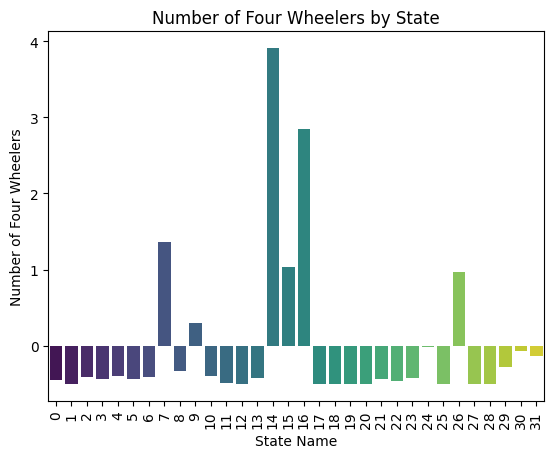

In [ ]:
state_four_wheelers = df.groupby('State Name')['Four Wheeler'].sum().reset_index()

# Plot the results
sns.barplot(data=state_four_wheelers, x='State Name', y='Four Wheeler', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Number of Four Wheelers')
plt.title('Number of Four Wheelers by State')
plt.show()

Mean Squared Error: 0.17


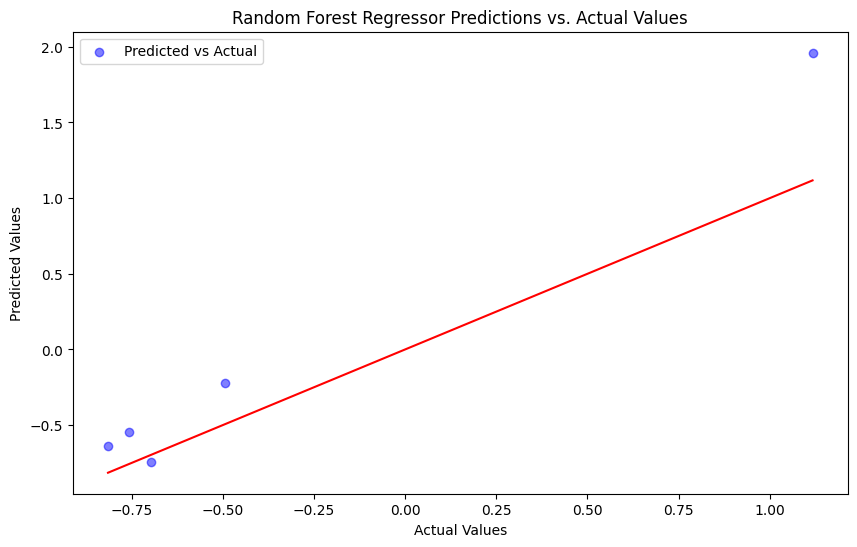

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select features and target
features = df[['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
               'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses',
               'Construction Equipment Vehicle', 'Other']]
target = df['total-charging-stations']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor Predictions vs. Actual Values')
plt.legend()
plt.show()